In [1]:
import sys
sys.path.append("..")
import torch
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="whitegrid", color_codes=True)
import train
import train_model_no_WS

%matplotlib inline

In [2]:
torch.cuda.is_available()

True

In [3]:
torch.__version__

'1.1.0'

In [4]:
# torch.cuda.get_device_name(0)

# Simple Network

In [5]:
%load_ext tensorboard
%tensorboard --logdir ./logs

config_simple = dict(
    logs_dir=f'./logs/simple/{datetime.now().strftime("%Y%m%d_%H%M%S")}',
    optimizer='Adam',
    optimizer_learning_rate=0.001,
    batch_size=128,
    num_epochs=80, 
    model='simple_conv',
    class_num=2,
    channels_in=2,
    augmentation=False,
    verbose=0
)

train.train(config_simple)

Reusing TensorBoard on port 6006 (pid 27358), started 2:04:32 ago. (Use '!kill 27358' to kill it.)

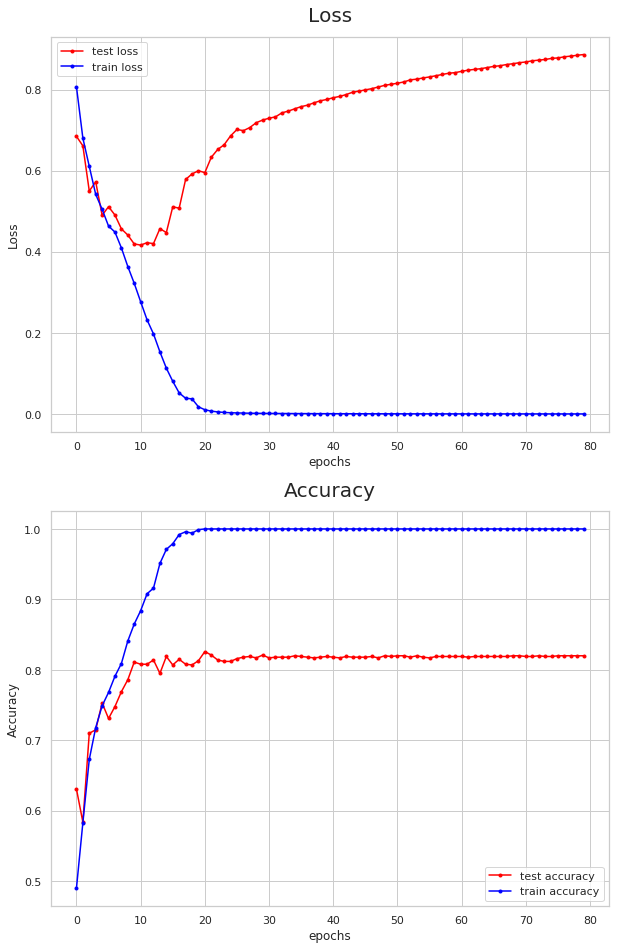

In [12]:
run_name = "simple_20200502_184800"
df_loss_test = pd.read_csv(f"csv/run-{run_name}-tag-Loss_test.csv")
df_loss_train = pd.read_csv(f"csv/run-{run_name}-tag-Loss_train.csv")
df_acc_test = pd.read_csv(f"csv/run-{run_name}-tag-Accuracy_test.csv")
df_acc_train = pd.read_csv(f"csv/run-{run_name}-tag-Accuracy_train.csv")

fig, axs = plt.subplots(2, 1, figsize=(10,16))
axs[0].plot(df_loss_test["Step"], df_loss_test["Value"], marker="o", markersize=3, color="red", label="test loss");
axs[0].plot(df_loss_train["Step"], df_loss_train["Value"], marker="o", markersize=3, color="blue", label="train loss");
axs[0].set_xlabel("epochs");axs[0].set_ylabel("Loss");axs[0].set_title("Loss", fontdict={"fontsize":20, "fontweight":1}, pad=15);
axs[0].legend();

axs[1].plot(df_acc_test["Step"], df_acc_test["Value"], marker="o", markersize=3, color="red", label="test accuracy");
axs[1].plot(df_acc_train["Step"], df_acc_train["Value"], marker="o", markersize=3, color="blue", label="train accuracy");
axs[1].set_xlabel("epochs");axs[1].set_ylabel("Accuracy");axs[1].set_title("Accuracy", fontdict={"fontsize":20, "fontweight":1}, pad=15);
axs[1].legend();

---

# No Weight Sharing Network

In [5]:
%load_ext tensorboard
%tensorboard --logdir ./logs

config_model_no_WS = dict(
    logs_dir=f'./logs/no_ws/{datetime.now().strftime("%Y%m%d_%H%M%S")}',
    optimizer='Adam',
    optimizer_learning_rate=0.001,
    batch_size=128,
    num_epochs=80,  # 250
    model='simple_conv',
    class_num=10,
    channels_in=1,
    augmentation=False,
    verbose=0
)

train_model_no_WS.train(config_model_no_WS)

Reusing TensorBoard on port 6006 (pid 27358), started 3:17:32 ago. (Use '!kill 27358' to kill it.)

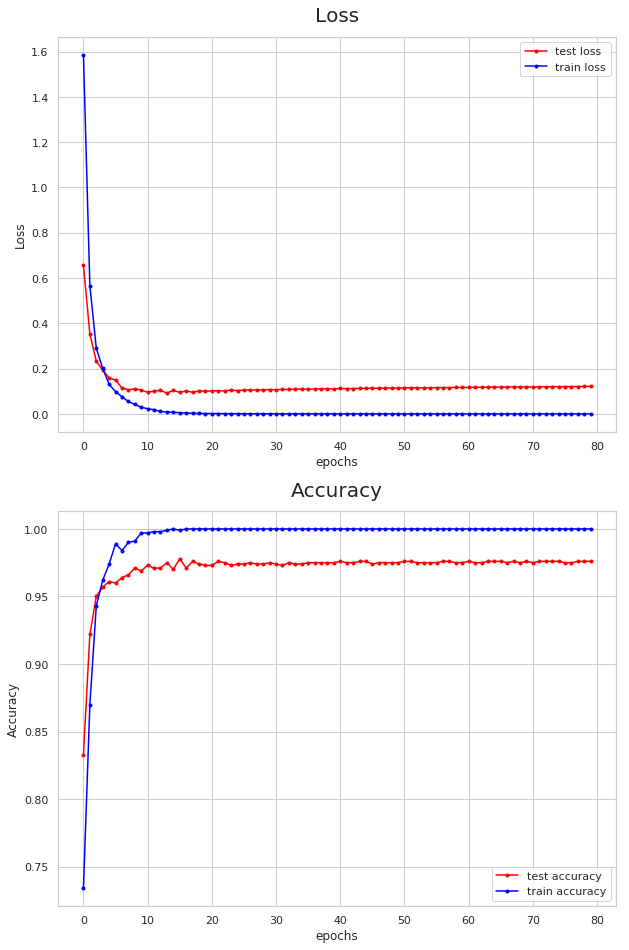

In [6]:
run_name = "no_ws_20200502_200100"
df_loss_test = pd.read_csv(f"csv/run-{run_name}-tag-Loss_test.csv")
df_loss_train = pd.read_csv(f"csv/run-{run_name}-tag-Loss_train.csv")
df_acc_test = pd.read_csv(f"csv/run-{run_name}-tag-Accuracy_test.csv")
df_acc_train = pd.read_csv(f"csv/run-{run_name}-tag-Accuracy_train.csv")

fig, axs = plt.subplots(2, 1, figsize=(10,16))
axs[0].plot(df_loss_test["Step"], df_loss_test["Value"], marker="o", markersize=3, color="red", label="test loss");
axs[0].plot(df_loss_train["Step"], df_loss_train["Value"], marker="o", markersize=3, color="blue", label="train loss");
axs[0].set_xlabel("epochs");axs[0].set_ylabel("Loss");axs[0].set_title("Loss", fontdict={"fontsize":20, "fontweight":1}, pad=15);
axs[0].legend();

axs[1].plot(df_acc_test["Step"], df_acc_test["Value"], marker="o", markersize=3, color="red", label="test accuracy");
axs[1].plot(df_acc_train["Step"], df_acc_train["Value"], marker="o", markersize=3, color="blue", label="train accuracy");
axs[1].set_xlabel("epochs");axs[1].set_ylabel("Accuracy");axs[1].set_title("Accuracy", fontdict={"fontsize":20, "fontweight":1}, pad=15);
axs[1].legend();

---

# Siamese

In [4]:
%load_ext tensorboard
%tensorboard --logdir ./logs

config_siamese = dict(
    logs_dir=f'./logs/siamese/{datetime.now().strftime("%Y%m%d_%H%M%S")}',
    optimizer='Adam',
    optimizer_learning_rate=0.001,
    batch_size=128,
    num_epochs=80,  # 250
    model='siamese',
    class_num=2,
    channels_in=1,
    augmentation=False,
    verbose=0
)

train.train(config_siamese)

Reusing TensorBoard on port 6006 (pid 27358), started 3:41:44 ago. (Use '!kill 27358' to kill it.)

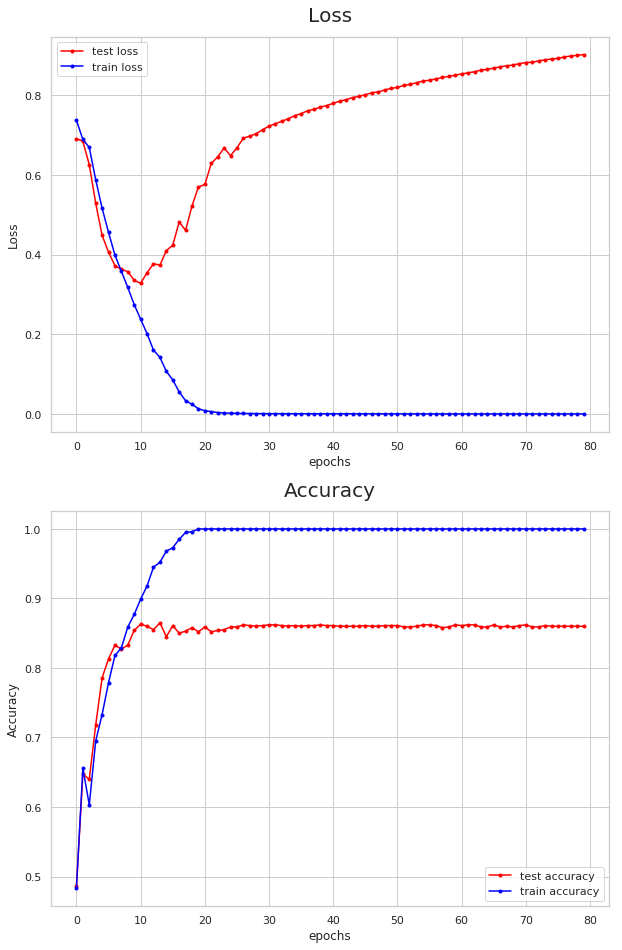

In [6]:
run_name = "siamese_20200502_202512"
df_loss_test = pd.read_csv(f"csv/run-{run_name}-tag-Loss_test.csv")
df_loss_train = pd.read_csv(f"csv/run-{run_name}-tag-Loss_train.csv")
df_acc_test = pd.read_csv(f"csv/run-{run_name}-tag-Accuracy_test.csv")
df_acc_train = pd.read_csv(f"csv/run-{run_name}-tag-Accuracy_train.csv")

fig, axs = plt.subplots(2, 1, figsize=(10,16))
axs[0].plot(df_loss_test["Step"], df_loss_test["Value"], marker="o", markersize=3, color="red", label="test loss");
axs[0].plot(df_loss_train["Step"], df_loss_train["Value"], marker="o", markersize=3, color="blue", label="train loss");
axs[0].set_xlabel("epochs");axs[0].set_ylabel("Loss");axs[0].set_title("Loss", fontdict={"fontsize":20, "fontweight":1}, pad=15);
axs[0].legend();

axs[1].plot(df_acc_test["Step"], df_acc_test["Value"], marker="o", markersize=3, color="red", label="test accuracy");
axs[1].plot(df_acc_train["Step"], df_acc_train["Value"], marker="o", markersize=3, color="blue", label="train accuracy");
axs[1].set_xlabel("epochs");axs[1].set_ylabel("Accuracy");axs[1].set_title("Accuracy", fontdict={"fontsize":20, "fontweight":1}, pad=15);
axs[1].legend();

---

# Siamese No Weight Sharing

In [5]:
%load_ext tensorboard
%tensorboard --logdir ./logs

config_siamese_no_WS = dict(
    logs_dir=f'./logs/siamese_no_ws/{datetime.now().strftime("%Y%m%d_%H%M%S")}',
    optimizer='Adam',
    optimizer_learning_rate=0.001,
    batch_size=128,
    num_epochs=80,  #250,
    model='siamese_no_WS',
    class_num=2,
    channels_in=1,
    augmentation=False,
    verbose=0
)

train.train(config_siamese_no_WS)

Reusing TensorBoard on port 6006 (pid 27358), started 3:50:49 ago. (Use '!kill 27358' to kill it.)

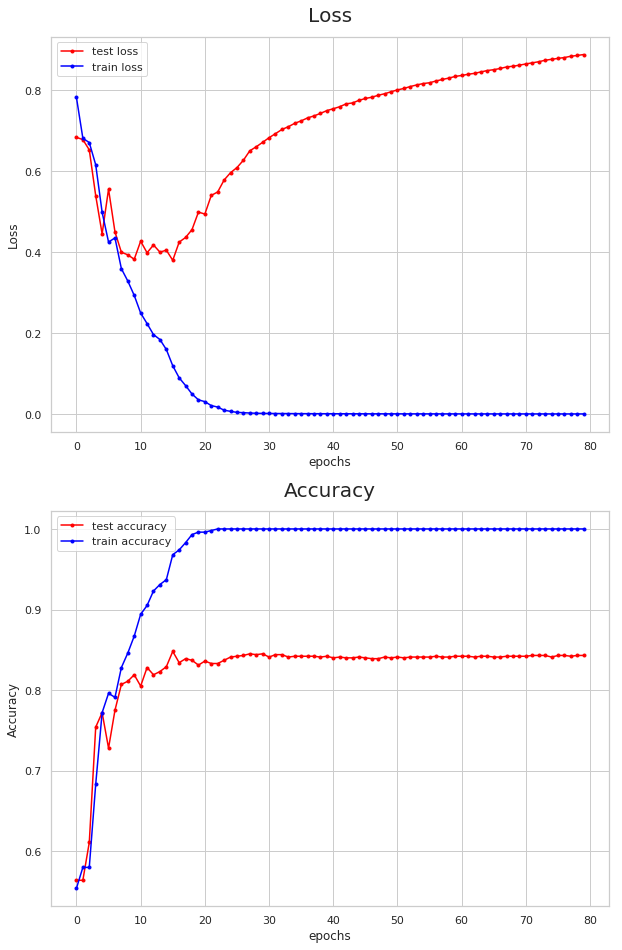

In [7]:
run_name = "siamese_no_ws_20200502_203417"
df_loss_test = pd.read_csv(f"csv/run-{run_name}-tag-Loss_test.csv")
df_loss_train = pd.read_csv(f"csv/run-{run_name}-tag-Loss_train.csv")
df_acc_test = pd.read_csv(f"csv/run-{run_name}-tag-Accuracy_test.csv")
df_acc_train = pd.read_csv(f"csv/run-{run_name}-tag-Accuracy_train.csv")

fig, axs = plt.subplots(2, 1, figsize=(10,16))
axs[0].plot(df_loss_test["Step"], df_loss_test["Value"], marker="o", markersize=3, color="red", label="test loss");
axs[0].plot(df_loss_train["Step"], df_loss_train["Value"], marker="o", markersize=3, color="blue", label="train loss");
axs[0].set_xlabel("epochs");axs[0].set_ylabel("Loss");axs[0].set_title("Loss", fontdict={"fontsize":20, "fontweight":1}, pad=15);
axs[0].legend();

axs[1].plot(df_acc_test["Step"], df_acc_test["Value"], marker="o", markersize=3, color="red", label="test accuracy");
axs[1].plot(df_acc_train["Step"], df_acc_train["Value"], marker="o", markersize=3, color="blue", label="train accuracy");
axs[1].set_xlabel("epochs");axs[1].set_ylabel("Accuracy");axs[1].set_title("Accuracy", fontdict={"fontsize":20, "fontweight":1}, pad=15);
axs[1].legend();

# Comparison

In [14]:
run_name1 = "simple_20200502_184800"
df_loss_test1 = pd.read_csv(f"csv/run-{run_name1}-tag-Loss_test.csv")
df_loss_train1 = pd.read_csv(f"csv/run-{run_name1}-tag-Loss_train.csv")
df_acc_test1 = pd.read_csv(f"csv/run-{run_name1}-tag-Accuracy_test.csv")
df_acc_train1 = pd.read_csv(f"csv/run-{run_name1}-tag-Accuracy_train.csv")

run_name2 = "no_ws_20200502_200100"
df_loss_test2 = pd.read_csv(f"csv/run-{run_name2}-tag-Loss_test.csv")
df_loss_train2 = pd.read_csv(f"csv/run-{run_name2}-tag-Loss_train.csv")
df_acc_test2 = pd.read_csv(f"csv/run-{run_name2}-tag-Accuracy_test.csv")
df_acc_train2 = pd.read_csv(f"csv/run-{run_name2}-tag-Accuracy_train.csv")

run_name3 = "siamese_20200502_202512"
df_loss_test3 = pd.read_csv(f"csv/run-{run_name3}-tag-Loss_test.csv")
df_loss_train3 = pd.read_csv(f"csv/run-{run_name3}-tag-Loss_train.csv")
df_acc_test3 = pd.read_csv(f"csv/run-{run_name3}-tag-Accuracy_test.csv")
df_acc_train3 = pd.read_csv(f"csv/run-{run_name3}-tag-Accuracy_train.csv")

run_name4 = "siamese_no_ws_20200502_203417"
df_loss_test4 = pd.read_csv(f"csv/run-{run_name4}-tag-Loss_test.csv")
df_loss_train4 = pd.read_csv(f"csv/run-{run_name4}-tag-Loss_train.csv")
df_acc_test4 = pd.read_csv(f"csv/run-{run_name4}-tag-Accuracy_test.csv")
df_acc_train4 = pd.read_csv(f"csv/run-{run_name4}-tag-Accuracy_train.csv")

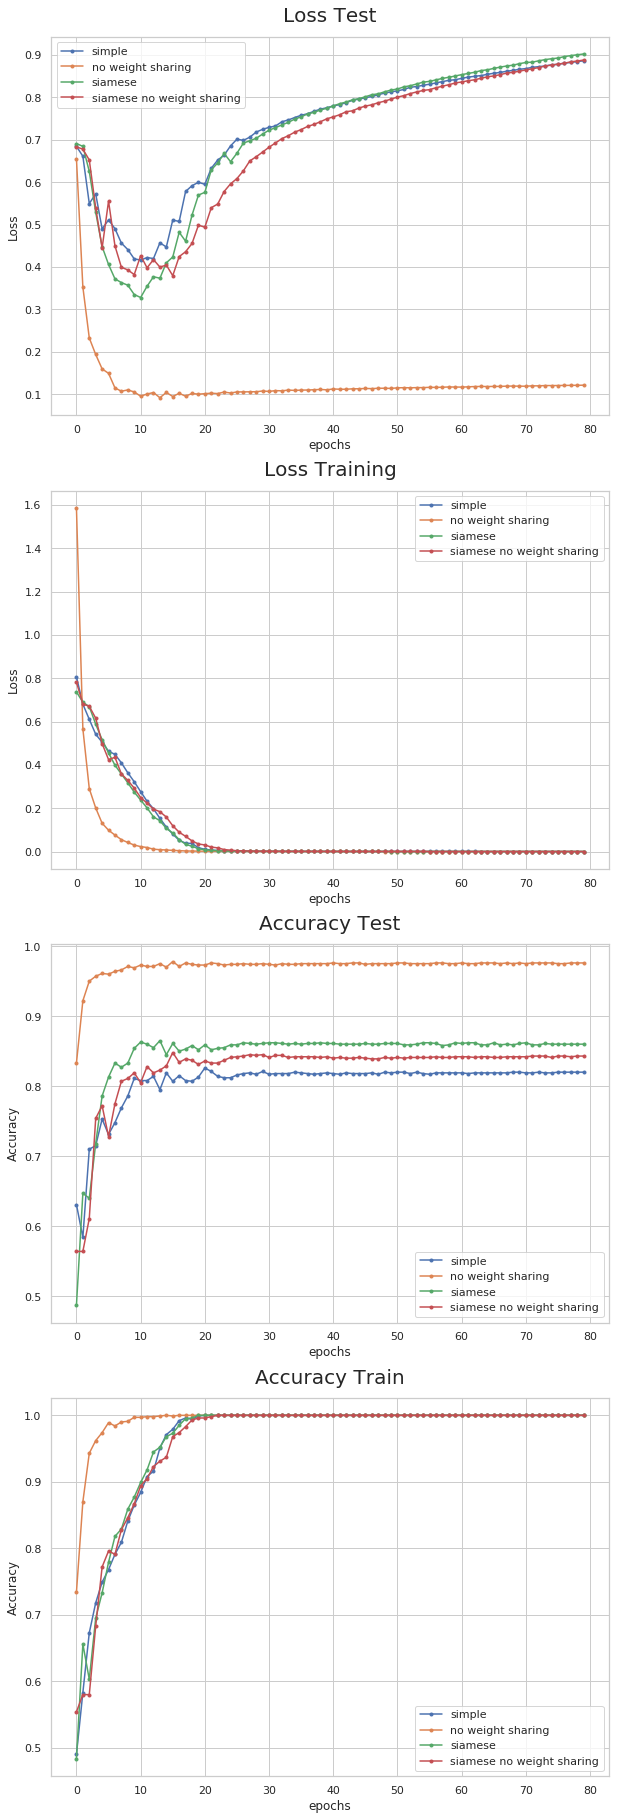

In [16]:
fig, axs = plt.subplots(4, 1, figsize=(10,32))

axs[0].plot(df_loss_test1["Step"], df_loss_test1["Value"], marker="o", markersize=3, label="simple");
axs[0].plot(df_loss_test2["Step"], df_loss_test2["Value"], marker="o", markersize=3, label="no weight sharing");
axs[0].plot(df_loss_test3["Step"], df_loss_test3["Value"], marker="o", markersize=3, label="siamese");
axs[0].plot(df_loss_test4["Step"], df_loss_test4["Value"], marker="o", markersize=3, label="siamese no weight sharing");
axs[0].set_xlabel("epochs");axs[0].set_ylabel("Loss");axs[0].set_title("Loss Test", fontdict={"fontsize":20, "fontweight":1}, pad=15);
axs[0].legend();

axs[1].plot(df_loss_train1["Step"], df_loss_train1["Value"], marker="o", markersize=3, label="simple");
axs[1].plot(df_loss_train2["Step"], df_loss_train2["Value"], marker="o", markersize=3, label="no weight sharing");
axs[1].plot(df_loss_train3["Step"], df_loss_train3["Value"], marker="o", markersize=3, label="siamese");
axs[1].plot(df_loss_train4["Step"], df_loss_train4["Value"], marker="o", markersize=3, label="siamese no weight sharing");
axs[1].set_xlabel("epochs");axs[1].set_ylabel("Loss");axs[1].set_title("Loss Training", fontdict={"fontsize":20, "fontweight":1}, pad=15);
axs[1].legend();

axs[2].plot(df_acc_test1["Step"], df_acc_test1["Value"], marker="o", markersize=3, label="simple");
axs[2].plot(df_acc_test2["Step"], df_acc_test2["Value"], marker="o", markersize=3, label="no weight sharing");
axs[2].plot(df_acc_test3["Step"], df_acc_test3["Value"], marker="o", markersize=3, label="siamese");
axs[2].plot(df_acc_test4["Step"], df_acc_test4["Value"], marker="o", markersize=3, label="siamese no weight sharing");
axs[2].set_xlabel("epochs");axs[2].set_ylabel("Accuracy");axs[2].set_title("Accuracy Test", fontdict={"fontsize":20, "fontweight":1}, pad=15);
axs[2].legend();

axs[3].plot(df_acc_train1["Step"], df_acc_train1["Value"], marker="o", markersize=3, label="simple");
axs[3].plot(df_acc_train2["Step"], df_acc_train2["Value"], marker="o", markersize=3, label="no weight sharing");
axs[3].plot(df_acc_train3["Step"], df_acc_train3["Value"], marker="o", markersize=3, label="siamese");
axs[3].plot(df_acc_train4["Step"], df_acc_train4["Value"], marker="o", markersize=3, label="siamese no weight sharing");
axs[3].set_xlabel("epochs");axs[3].set_ylabel("Accuracy");axs[3].set_title("Accuracy Train", fontdict={"fontsize":20, "fontweight":1}, pad=15);
axs[3].legend();